In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


plt.style.use('rossidata')

In [2]:
data=pd.read_csv('data/megaframe.csv')
data['Time of Death'][data['Time of Death']==0]=np.nan
data['Time of Death'][data['Time of Death']==-1]=64
data=data[~np.isnan(data['Time of Death'])]

/Users/nicholasrossi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nicholasrossi/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


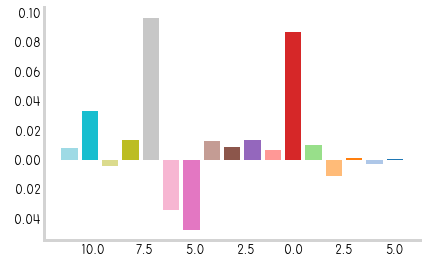

In [26]:
### Killing curve plots

plt.close('all')
fig,ax=plt.subplots()
fig2,ax2=plt.subplots()
strains=data['Strain'].unique()

colorz = cm.tab20(np.linspace(0, 1, len(strains)))
recs=[]

for z,strain in enumerate(strains):
    sliceo=data[data['Strain']==strain]
    maxval=len(sliceo)
    traj=[]
    xvect=np.linspace(0,60*5,61)
    for t in range(61):
        traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)

    ax.plot(xvect,traj,label=strain,color=colorz[z])
    recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colorz[z]))

    
    ind=next(x[0] for x in enumerate(traj) if x[1] < .6)
    start=np.mean(sliceo['Fluor1 mean'])
    end=np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start
    ax2.bar(5-z,np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start-1,color=colorz[z])

#     ax2.scatter(1,5-z,color='black',s=100)
#     ax2.scatter(np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start,5-z,color=colorz[z],s=200)
#     ax2.annotate('',xy=(end,5-z),
#             xytext=(1,5-z), va='center', multialignment='right',
#             arrowprops={'arrowstyle': '->', 'lw': 4, 'ec': 'grey','alpha': 0.25})
ax.legend(recs, strains, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1.6, 1))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('% Cells alive')
#fig.savefig('figures/killing_curves.png',dpi=300)
fig2

In [27]:
### arrow plots
### Killing curve plots

plt.close('all')
fig2,ax2=plt.subplots()
strains=data['Strain'].unique()

colorz = cm.tab20(np.linspace(0, 1, len(strains)))
recs=[]
for z,strain in enumerate(strains):
    sliceo=data[data['Strain']==strain]
    maxval=len(sliceo)
    traj=[]
    xvect=np.linspace(0,60*5,61)
    for t in range(61):
        traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)

    recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colorz[z]))

    
    ind=next(x[0] for x in enumerate(traj) if x[1] < .6)
    start=np.mean(sliceo['Fluor1 mean'])
    end=np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start
#     ax2.bar(5-z,np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start-1,color=colorz[z])

    ax2.scatter(1,5-z,color='black',s=100)
    ax2.scatter(np.mean(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind])/start,5-z,color=colorz[z],s=200)
    ax2.annotate('',xy=(end,5-z),
    xytext=(1,5-z), va='center', multialignment='right',
    arrowprops={'arrowstyle': '->', 'lw': 4, 'ec': 'grey','alpha': 0.25})
#fig.savefig('figures/killing_curves.png',dpi=300)
fig2.savefig('figures/arrow_plot.png',dpi=300)

In [59]:
### logistic regression plots
plt.close('all')    
def model(x):
    return 1 / (1 + np.exp(-x))
fig,ax=plt.subplots()
for z,strain in enumerate(strains):
    sliceo=data[data['Strain']==strain]
    maxval=len(sliceo)
    traj=[]

    for t in range(61):
        traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)


    try:
        ind=next(x[0] for x in enumerate(traj) if x[1] < .4)
    except:
        print(strain+' cells do not die enough')
        ind=61
    
    clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')


    dead=sliceo[sliceo['Time of Death']<=ind]['Fluor1 mean'].values
    alive=sliceo[sliceo['Time of Death']>ind]['Fluor1 mean'].values

    data_tot=np.concatenate((dead, alive))
    clf.fit(data_tot.reshape(-1, 1) , np.concatenate((np.zeros(len(dead)), np.ones(len(alive)))).reshape(-1, 1) )
    X_test=np.linspace(min(data_tot),max(data_tot),1000)

    loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot((X_test-min(data_tot))/(max(data_tot)-min(data_tot)), loss, color=colorz[z])
ax.legend(recs, strains, title='Reporter', loc=1,ncol=2,bbox_to_anchor=(1.6, 1))

fig.savefig('figures/logistic.png',dpi=300)


marRAB cells do not die enough
rpsT cells do not die enough


In [48]:
ind=next(x[0] for x in enumerate(traj) if x[1] < .5)

StopIteration: 

In [3]:

#### Distribution animations
plt.close('all')
fig,ax=plt.subplots()
sliceo=data[data['Strain']=='rob']

traj=[]
xvect=np.linspace(0,60*5,61)
for t in range(61):
    traj.append((maxval-len(sliceo[sliceo['Time of Death']<=t]))/maxval)

ind=next(x[0] for x in enumerate(traj) if x[1] < 0.1)
        
datum=sliceo['Fluor1 mean']
datum2=sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind]
# probs, bons = np.histogram(sliceo['Fluor1 mean'], normed='True', bins=bins)
# ax.plot(bons[1:], np.cumsum(probs / np.sum(probs)),  drawstyle='steps-pre')
# probs, bons = np.histogram(sliceo['Fluor1 mean'][sliceo['Time of Death']>=ind], normed='True', bins=bins)
# ax.plot(bons[1:], np.cumsum(probs / np.sum|(probs)),  drawstyle='steps-pre')
# fig


density = gaussian_kde(datum)
xs = np.linspace(500,16000,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
ax.plot(xs,density(xs))

density = gaussian_kde(datum2)
density.covariance_factor = lambda : .25
density._compute_covariance()
ax.plot(xs,density(xs))

ax.set_xscale('log')
fig

NameError: name 'maxval' is not defined

In [62]:
### animation of distribution
plt.close('all')
fig_animate,ax=plt.subplots()

lines=[]
sliceos=[data[data['Strain']=='rob'],data[data['Strain']=='purA']]
colors=['#e684ae','teal']
for n,l in enumerate(sliceos):
    lines.append(ax.plot([],[],color=colors[n]))
xs = np.linspace(500,16000,200)
ax.set_xlim([500,16000])
ax.set_xscale('log')
ax.set_ylim([0,.0006])
def animate(z):
    for j,sliceo in enumerate(sliceos):
        density = gaussian_kde(sliceo['Fluor1 mean'][sliceo['Time of Death']>=z])
        density.covariance_factor = lambda : .25
        density._compute_covariance()
        ax.plot(xs,density(xs),color='grey',alpha=0.05)

        lines[j][0].set_data(xs,density(xs))

    return lines

anim3 = animation.FuncAnimation(fig_animate, animate,frames=61,  blit=False)
plt.tight_layout()
anim3.save('evolution.mp4', writer='ffmpeg',bitrate=1800)
#HTML(anim3.to_html5_video())

In [77]:
data['Strain'].unique()

array(['marRAB', 'gadX', 'crp', 'ompF', 'sigma70', 'SoxS'], dtype=object)